# 판다스(Pandas) 기초
<참고자료 및 코드 출처>
1. DANDYRILLA님의 github "판다스(pandas) 기본 사용법 익히기"
2. 파이썬 머신러닝 완벽 가이드(권철민 저)
3. 김도형의 데이터 사이언스 스쿨
4. R, Python 분석과 프로그래밍의 친구(by R Friend)

**pandas 외에도 배열 구조나 랜덤 값 생성 등의 기능을 활용하기 위한 numpy 와 그래프를 그리기 위한 matplotlib 패키지들도 함께 import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 object 생성하기
- 데이터 object는 "데이터를 담고 있는 그릇"이라고 생각하면 이해하기 쉽다
- 판다스에서 자주 사용하게 될 데이터 object는 "Series" 와 "DataFrame"이 있다
- Series는 데이터를 1차원 배열(칼럼이 하나)로 담고 있고, DataFrame은 데이터를 2차원 배열(칼럼이 여러 개)로 담고 있다
- DataFrame은 여러 개의 Series로 이루어졌다

### Series는 다음과 같이 값의 리스트를 넘겨줘서 만들 수 있다
- index의 경우, 0 부터 시작해서 1씩 증가하는 정수 index가 사용된다

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])  # np.nan 은 "NaN(Na와 Null을 모두 표현)"을 의미
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### DataFrame은 여러 형태의 데이터를 받아 생성할 수 있다
- numpy array를 받아서 DataFrame 생성이 가능하다
- pd.DataFrame() 이라는 클래스 생성자를 사용한다

In [3]:
# 날짜 값들을 만들기
dates = pd.date_range('20130101', periods = 6)

# 행에 해당하는 기준인 인덱스를 index라는 인수로 전달
# 열에 해당하는 기준인 컬럼을 columns라는 인수로 전달
# <참고> np.random.randn(m, n): 평균 0, 표준편차 1의 표준정규분포 난수로 이루어진 matrix array(m, n)를 생성
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,0.472836,-0.000761,-1.040429,0.152076
2013-01-02,0.461397,-0.669242,-0.225294,-0.952451
2013-01-03,0.324977,0.175157,-0.839797,-0.093737
2013-01-04,0.941575,-1.211694,-0.811266,-0.076963
2013-01-05,1.458312,-0.885358,-1.660743,2.021500
2013-01-06,-1.035226,1.476234,0.109521,-0.435898


- 여러 종류의 자료들이 담긴 딕셔너리(dict)를 받아서 DataFrame을 만들 수 있다
    - 딕셔너리의 key 값이 열을 정의하는 column
    - 행을 정의하는 index는 0 부터 시작해서 1씩 증가하는 정수 index

In [4]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),  # pd.Timestamp() 는 주어진 값을 'yyyy-mm-dd hh:mm:ss' 형태로 반환
                    'C': pd.Series(1, index = list(range(4)), dtype = 'float32'),
                    'D': np.array([3] * 4, dtype = 'int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [5]:
# 위에서 만든 df2의 데이터 타입 확인
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

**<참고> 주피터에서 'df2.'를 입력하고 탭을 누르면, dtypes 외에 다른 속성들을 확인할 수 있다**

## 데이터 확인하기
- 데이터 프레임에 있는 자료들 중, 몇 개의 자료들만 확인해보고 싶다면 .head() 와 .tail() 메소드를 사용하면 된다

In [6]:
# 괄호 안에 아무런 숫자도 안 넣으면, default = 5가 적용됨
df.head()

,A,B,C,D
2013-01-01,0.472836,-0.000761,-1.040429,0.152076
2013-01-02,0.461397,-0.669242,-0.225294,-0.952451
2013-01-03,0.324977,0.175157,-0.839797,-0.093737
2013-01-04,0.941575,-1.211694,-0.811266,-0.076963
2013-01-05,1.458312,-0.885358,-1.660743,2.021500


In [7]:
df.tail(3)

,A,B,C,D
2013-01-04,0.941575,-1.211694,-0.811266,-0.076963
2013-01-05,1.458312,-0.885358,-1.660743,2.021500
2013-01-06,-1.035226,1.476234,0.109521,-0.435898


In [8]:
# 데이터 프레임의 인덱스 확인: .index
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# 데이터 프레임의 컬럼 확인: .columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [10]:
# 데이터 프레임 안에 들어있는 numpy 데이터 확인: .values
df.values

array([[ 4.72835714e-01, -7.60948916e-04, -1.04042872e+00,
         1.52076047e-01],
       [ 4.61396680e-01, -6.69242026e-01, -2.25293813e-01,
        -9.52451303e-01],
       [ 3.24977169e-01,  1.75157096e-01, -8.39796781e-01,
        -9.37373381e-02],
       [ 9.41575171e-01, -1.21169435e+00, -8.11265968e-01,
        -7.69632027e-02],
       [ 1.45831196e+00, -8.85357733e-01, -1.66074277e+00,
         2.02150000e+00],
       [-1.03522590e+00,  1.47623394e+00,  1.09521461e-01,
        -4.35897845e-01]])

- 데이터 프레임의 기초통계량 확인: .describe() 메소드 사용
    - count
    - mean
    - std
    - min
    - 4분위수(25%, 50%, 75%)
    - max

In [11]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.437312,-0.185944,-0.744668,0.102421
std,0.834212,0.969788,0.622823,1.015729
min,-1.035226,-1.211694,-1.660743,-0.952451
25%,0.359082,-0.831329,-0.990271,-0.350358
50%,0.467116,-0.335001,-0.825531,-0.085350
75%,0.824390,0.131178,-0.371787,0.094816
max,1.458312,1.476234,0.109521,2.021500


In [12]:
# 데이터 프레임을 transpose 시키기: .T 속성(메소드가 아니라 속성)
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.472836,0.461397,0.324977,0.941575,1.458312,-1.035226
B,-0.000761,-0.669242,0.175157,-1.211694,-0.885358,1.476234
C,-1.040429,-0.225294,-0.839797,-0.811266,-1.660743,0.109521
D,0.152076,-0.952451,-0.093737,-0.076963,2.021500,-0.435898


In [13]:
# .T를 "메소드"로 착각하면 안된다!! .T는 "속성"이다!!
# 따라서 .T()로 호출하는 경우 에러가 발생한다
df.T()

TypeError: 'DataFrame' object is not callable

- 행과 열 이름을 정렬하기: .sort_index() 메소드
    - axis = 0 : index를 기준으로 정렬
    - axis = 1 : column을 기준으로 정렬
    - ascending = True : 오름차순 정렬
    - ascending = False : 내림차순 정렬

In [14]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,0.152076,-1.040429,-0.000761,0.472836
2013-01-02,-0.952451,-0.225294,-0.669242,0.461397
2013-01-03,-0.093737,-0.839797,0.175157,0.324977
2013-01-04,-0.076963,-0.811266,-1.211694,0.941575
2013-01-05,2.021500,-1.660743,-0.885358,1.458312
2013-01-06,-0.435898,0.109521,1.476234,-1.035226


- 데이터 프레임 내부에 있는 값으로 정렬하기: .sort_values() 메소드

In [15]:
# 'B' column에 대해 정렬
df.sort_values(by = "B")

,A,B,C,D
2013-01-04,0.941575,-1.211694,-0.811266,-0.076963
2013-01-05,1.458312,-0.885358,-1.660743,2.021500
2013-01-02,0.461397,-0.669242,-0.225294,-0.952451
2013-01-01,0.472836,-0.000761,-1.040429,0.152076
2013-01-03,0.324977,0.175157,-0.839797,-0.093737
2013-01-06,-1.035226,1.476234,0.109521,-0.435898


## 데이터 선택하기
- [] 슬라이싱 사용

In [16]:
# 'A'라는 이름을 가진 column의 데이터만 추출
df['A']

2013-01-01    0.472836
2013-01-02    0.461397
2013-01-03    0.324977
2013-01-04    0.941575
2013-01-05    1.458312
2013-01-06   -1.035226
Freq: D, Name: A, dtype: float64

In [17]:
type(df['A'])

pandas.core.series.Series

In [18]:
# 0, 1, 2행을 추출 (특정 '행 범위'의 데이터 추출)
df[0:3]

,A,B,C,D
2013-01-01,0.472836,-0.000761,-1.040429,0.152076
2013-01-02,0.461397,-0.669242,-0.225294,-0.952451
2013-01-03,0.324977,0.175157,-0.839797,-0.093737


In [19]:
# index명에 해당하는 값들 추출
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.461397,-0.669242,-0.225294,-0.952451
2013-01-03,0.324977,0.175157,-0.839797,-0.093737
2013-01-04,0.941575,-1.211694,-0.811266,-0.076963


In [20]:
# 특정 행 하나를 가져오고 싶은 경우
# 다음과 같이 입력하면, '20130102'라는 이름의 'index'가 아니라 'column'을 갖고 있는지 찾게 되므로 에러 발생!!
df['20130102']

KeyError: '20130102'

In [21]:
# 특정 '행 하나'를 선택하고 싶은 경우, 다음과 같이 입력하면 된다
df['20130102':'20130102']

,A,B,C,D
2013-01-02,0.461397,-0.669242,-0.225294,-0.952451


**<요약>** 
- 데이터 프레임 자체가 갖고 있는 슬라이싱은 다음과 같은 형태로 사용 가능!!
    - df[컬럼명]
    - df[시작 인덱스:끝 인덱스 + 1]
    - df[시작 인덱스명:끝 인덱스명]

### 라벨의 이름을 이용(명칭 기반 인덱싱)하여 데이터 선택하기: .loc
- 행 위치에는 DataFrame index 값을, 열 위치에는 column명을 입력
- <주의> loc[]에 슬라이싱 기호를 적용하면 (종료 값 - 1)이 아니라 종료 값까지 포함하는 것을 의미!! (명칭은 숫자 형이 아닐 수 있기 때문이다)


In [22]:
# 첫 번째 index의 값인 '2013-01-01'에 해당하는 모든 column의 값 추출
df.loc[dates[0]]

# 아래와 같이 입력해도 동일하게 작동함
# df.loc['20130101']
# df.loc['2013-01-01']

A    0.472836
B   -0.000761
C   -1.040429
D    0.152076
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
# column 'A', 'B'에 대한 모든 값 추출
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.472836,-0.000761
2013-01-02,0.461397,-0.669242
2013-01-03,0.324977,0.175157
2013-01-04,0.941575,-1.211694
2013-01-05,1.458312,-0.885358
2013-01-06,-1.035226,1.476234


In [24]:
# index '2013-01-02'부터 '2013-01-04'까지의 column 'A', 'B'의 값 추출
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.461397,-0.669242
2013-01-03,0.324977,0.175157
2013-01-04,0.941575,-1.211694


In [25]:
# 특정 index 값의 column 'A', 'B' 값을 추출
df.loc[dates[0], ['A', 'B']]

A    0.472836
B   -0.000761
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
# 특정 index 값과 특정 column에 있는 값을 추출
df.at[dates[0], 'A']

# 위 코드의 결과는 아래의 코드 결과와 동일함
#df.loc[dates[0], 'A']

0.4728357137416509

### 위치를 나타내는 index 번호를 이용(위치 기반 인덱싱)하여 데이터 선택하기: .iloc
- 행과 열 값으로 정수형 또는 정수형의 슬라이싱, 팬시 리스트 값을 입력
- iloc[]에 위치 인덱싱이 아닌 명칭을 입력하면 오류가 발생
    - ex) data_df.iloc[0, 'Name']
- iloc[]에 문자열 인덱스를 행 위치에 입력해도 오류가 발생
    - ex) data_df.iloc['one', 0]
- iloc[]는 슬라이싱과 팬시 인덱싱은 제공하나, 명확한 위치 기반 인덱싱이 사용되어야 하는 제약으로 인해 불린 인덱싱은 제공하지 않는다

In [27]:
# index 번호(0 부터 시작) 3을 선택
df.iloc[3]

A    0.941575
B   -1.211694
C   -0.811266
D   -0.076963
Name: 2013-01-04 00:00:00, dtype: float64

In [28]:
# 행의 index는 3, 4이므로 네 번째 행과 다섯 번째 행을 선택
# 열의 index는 0, 1 이므로 첫 번째 열과 두 번째 열을 선택
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.941575,-1.211694
2013-01-05,1.458312,-0.885358


In [29]:
# 행과 열의 index를 리스트로 넘겨주기
# 두 번째, 세 번째, 다섯 번째 행과 첫 번째, 세 번째 열을 선택
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.461397,-0.225294
2013-01-03,0.324977,-0.839797
2013-01-05,1.458312,-1.660743


In [30]:
# 슬라이싱을 이용해서 행 또는 열 전체를 선택
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.461397,-0.669242,-0.225294,-0.952451
2013-01-03,0.324977,0.175157,-0.839797,-0.093737


In [31]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.000761,-1.040429
2013-01-02,-0.669242,-0.225294
2013-01-03,0.175157,-0.839797
2013-01-04,-1.211694,-0.811266
2013-01-05,-0.885358,-1.660743
2013-01-06,1.476234,0.109521


In [32]:
# 값 하나를 선택
df.iloc[1, 1]

# 아래의 코드도 위의 코드와 동일한 결과를 반환해준다
# df.iat[1, 1]

-0.6692420264543495

### 불린 인덱싱(조건 설정)을 사용하여 데이터 선택하기
- 보통 이걸 가장 많이 사용하므로 잘 기억해두자!!
- 특정한 열의 값들을 기준으로 조건을 만들어서, 해당 조건에 만족하는 '행'들만 선택

In [33]:
# 'A'라는 열에 들어있는 값이 양수인 경우에 해당하는 '행'들을 선택
df[df.A > 0]

,A,B,C,D
2013-01-01,0.472836,-0.000761,-1.040429,0.152076
2013-01-02,0.461397,-0.669242,-0.225294,-0.952451
2013-01-03,0.324977,0.175157,-0.839797,-0.093737
2013-01-04,0.941575,-1.211694,-0.811266,-0.076963
2013-01-05,1.458312,-0.885358,-1.660743,2.021500


In [34]:
# 각 값을 기준으로 조건 만들기 (개별 선택)
# 조건을 값이 양수인 것들로 설정하면, 나머지 값들(0 또는 음수)은 NaN으로!
df[df > 0]

,A,B,C,D
2013-01-01,0.472836,NaN,NaN,0.152076
2013-01-02,0.461397,NaN,NaN,NaN
2013-01-03,0.324977,0.175157,NaN,NaN
2013-01-04,0.941575,NaN,NaN,NaN
2013-01-05,1.458312,NaN,NaN,2.021500
2013-01-06,NaN,1.476234,0.109521,NaN


In [35]:
# 필터링을 해야 하는 경우: isin() 메소드 사용
# 'E'라는 새로운 열 하나를 추가한 후, 새롭게 추가된 열에 들어있는 값을 기준으로 행을 선택
df2 = df.copy() # 원본 데이터 유지를 위해 복사본 사용
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2)

df2[df2['E'].isin(['two', 'four'])]

                   A         B         C         D      E
2013-01-01  0.472836 -0.000761 -1.040429  0.152076    one
2013-01-02  0.461397 -0.669242 -0.225294 -0.952451    one
2013-01-03  0.324977  0.175157 -0.839797 -0.093737    two
2013-01-04  0.941575 -1.211694 -0.811266 -0.076963  three
2013-01-05  1.458312 -0.885358 -1.660743  2.021500   four
2013-01-06 -1.035226  1.476234  0.109521 -0.435898  three


,A,B,C,D,E
2013-01-03,0.324977,0.175157,-0.839797,-0.093737,two
2013-01-05,1.458312,-0.885358,-1.660743,2.021500,four


### 데이터 변경하기
- 데이터 프레임의 특정 값들을 다른 값으로 변경 가능

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods = 6))
s1

df['F'] = s1

In [37]:
# 데이터 프레임의 특정 값 하나를 선택하여 다른 값으로 변경
df.at[dates[0], 'A'] = 0

# 위치(index 번호)를 이용한 변경도 가능
df.iloc[0, 1] = 0

# 여러 값을 한꺼번에 변경하고 싶은 경우, 데이터의 크기만 잘 맞춰주면 된다
df.loc[:, 'D'] = np.array([5] * len(df))

In [38]:
# 위에서 변경한 데이터들을 모두 적용한 데이터 프레임의 값들을 확인
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.040429,5,NaN
2013-01-02,0.461397,-0.669242,-0.225294,5,1.0
2013-01-03,0.324977,0.175157,-0.839797,5,2.0
2013-01-04,0.941575,-1.211694,-0.811266,5,3.0
2013-01-05,1.458312,-0.885358,-1.660743,5,4.0
2013-01-06,-1.035226,1.476234,0.109521,5,5.0


In [39]:
# 불린 인덱싱(조건 설정)을 이용한 데이터 선택 방법을 사용하여, 특정 조건을 만족하는 값들만 변경
# ex) 양수의 값을 가지는 값들에 한해서 음수로 변경
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.040429,-5,NaN
2013-01-02,-0.461397,-0.669242,-0.225294,-5,-1.0
2013-01-03,-0.324977,-0.175157,-0.839797,-5,-2.0
2013-01-04,-0.941575,-1.211694,-0.811266,-5,-3.0
2013-01-05,-1.458312,-0.885358,-1.660743,-5,-4.0
2013-01-06,-1.035226,-1.476234,-0.109521,-5,-5.0


### DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환

**리스트, ndarray에서 DataFrame변환**

In [40]:
import numpy as np

col_name1 = ['col1']
list1 = [1, 2, 3]
array1 = np.array(list1)
print('array1 shape:', array1.shape)

df_list1 = pd.DataFrame(list1, columns = col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)

df_array1 = pd.DataFrame(array1, columns = col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [41]:
# 3개의 컬럼명이 필요함
col_name2 = ['col1', 'col2', 'col3']

# 2행 x 3열 형태의 리스트와 ndarray 생성 한 뒤, 이를 DataFrame으로 변환
list2 = [[1, 2, 3],
         [11, 12, 13]]
array2 = np.array(list2)
print('array2 shape:', array2.shape)

df_list2 = pd.DataFrame(list2, columns = col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)

df_array1 = pd.DataFrame(array2, columns = col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array1)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


**딕셔너리(dict)에서 DataFrame변환**

In [42]:
# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
dict = {'col1':[1, 11], 'col2':[2, 22], 'col3':[3, 33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


**DataFrame을 ndarray로 변환**
- values를 이용한 ndarray로의 변환은 매우 많이 사용되므로 반드시 기억하자!!

In [43]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values shape:', array3.shape)
print(array3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]


**DataFrame을 리스트와 딕셔너리로 변환**
- 리스트로의 변환은 values에서 얻은 ndarray에서 tolist()를 호출
- 딕셔너리로의 변환은 DataFrame 객체의 to_dict() 메소드를 호출하는데, 인자로 'list'를 입력하면 딕셔너리의 값이 리스트형으로 반환

In [44]:
# DataFrame을 리스트로 변환
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

# DataFrame을 딕셔너리로 변환
dict3 = df_dict.to_dict('list') # 'list'를 입력해주지 않으면, {0:1, 1:11, ...} 이런 식으로 반환됨
print('\n df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


## DataFrame 데이터 삭제하기
- drop() 메소드를 사용
- DataFrame.drop(labels = None, axis = 0, index = None, columns = None, level = None, inplace = False, errors = 'raise')
- 위에서 가장 중요한 파라미터는 labels, axis, inplace 이다
    - axis = 0: row 방향 축      --> 이상치 데이터를 삭제하는 경우에 주로 사용!!
    - axis = 1: column 방향 축   --> 기존 column 값을 가공해서 새로운 column을 만들고 삭제(일반적으로 axis = 1을 쓰는 경우가 많음)
    - inplace = False: 원본 DataFrame은 유지하고 drop된 DataFrame을 새롭게 객체 변수로 받고 싶은 경우
    - inplace = True: 원본 DataFrame에 drop된 결과를 적용할 경우

**inplace = True 와 inplace = False 둘 중, 하나를 딱 정해서 사용하자. 그래야 헷갈리지 않는다!!**
- 개인적으로 나는 inplace = False 로 통일해서 사용하는 걸로!

## Index 객체
- DataFrame, Series에서 Index 객체만 추출하려면, DataFrame.index 또는 Series.index 속성을 통해 가능
- Index는 오직 식별용으로만 사용
- 한 번 만들어진 DataFrame 및 Series의 Index 객체는 함부로 변경할 수 없다
- DataFrame 및 Series에 reset_index() 메소드를 수행하면, 새롭게 인덱스를 연속 숫자형으로 할당하며 기존 인덱스는 'index'라는 새로운 칼럼 명으로 추가
    - 인덱스가 연속된 int 숫자형 데이터가 아닐 경우에, 다시 이를 연속 int 숫자형 데이터로 만들 때 주로 사용!!
    - Series에 reset_index()를 적용하면, Series가 아닌 DataFrame이 반환!!
    - reset_index()의 파라미터 중, drop = True로 설정하면 기존 인덱스는 새로운 칼럼으로 추가되지 않고 삭제(drop)된다!!

## 결측치(Missing Data) 처리하기
- 결측 데이터는 column에 값이 없는, 즉 NULL인 경우를 의미한다
- 기본적으로 머신러닝 알고리즘은 이 NaN 값을 처리하지 않으므로, 이 값을 다른 값으로 대체해야 한다
    - NaN 값은 평균, 총합 등의 함수 연산 시 제외된다!
- 판다스(pandas)에서는 결측치를 np.nan 으로 나타내며, 기본적으로 연산에서 제외시킨다

In [45]:
# 재 인덱싱(reindex)은 해당 축에 대하여 index를 변경/추가/삭제
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.040429,5,NaN,1.0
2013-01-02,0.461397,-0.669242,-0.225294,5,1.0,1.0
2013-01-03,0.324977,0.175157,-0.839797,5,2.0,NaN
2013-01-04,0.941575,-1.211694,-0.811266,5,3.0,NaN


In [46]:
# 해당 값이 결측치인지 아닌지 확인하고자 하는 경우: isna() 메소드 사용
# 결측치이면 True, 값이 있으면 False를 반환
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [47]:
# 결측치의 개수는 isna() 결과에 sum() 함수를 추가해서 구할 수 있다
df1.isna().sum()

A    0
B    0
C    0
D    0
F    1
E    2
dtype: int64

In [48]:
# 결측치가 하나라도 존재하는 행들을 버리고 싶은 경우: dropna() 메소드 사용
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,0.461397,-0.669242,-0.225294,5,1.0,1.0


*<주의>* - *inplace 파라미터*
- fillna()를 이용해 반환 값을 다시 받거나, inplace = True 파라미터를 fillna()에 추가해야 실제 데이터 세트 값이 변경된다!!

In [49]:
# 결측치가 있는 부분을 다른 값으로 채우고 싶은 경우: fillna() 메소드 사용
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.040429,5,5.0,1.0
2013-01-02,0.461397,-0.669242,-0.225294,5,1.0,1.0
2013-01-03,0.324977,0.175157,-0.839797,5,2.0,5.0
2013-01-04,0.941575,-1.211694,-0.811266,5,3.0,5.0


## 연산(Operations)

### 통계적 지표들 (Stats)

In [50]:
# 평균 구하기 (default인 axis = 0을 기준으로 평균이 구해진다)
df.mean()

A    0.358506
B   -0.185817
C   -0.744668
D    5.000000
F    3.000000
dtype: float64

In [51]:
# 열(axis = 1) 축에 대해서 평균 구하기
df.mean(axis = 1)

2013-01-01    0.989893
2013-01-02    1.113372
2013-01-03    1.332067
2013-01-04    1.383723
2013-01-05    1.582442
2013-01-06    2.110106
Freq: D, dtype: float64

In [52]:
# 서로 차원이 달라서 index를 맞추어야 하는 두 object 간의 연산
# pandas는 맞추어야 할 축만 지정해주면, 자동으로 해당 축을 기준으로 맞추어 연산을 수행

# 기존 데이터 프레임의 index가 2013-01-03, 04, 05인 모든 column에 해당하는 값에, 각 1.0, 3.0, 5.0 을 빼준 값이 결과로 나온다
# 결측치가 존재하는 경우에는 계산이 불가능하므로 NaN 으로 표시된다
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)  # shift를 사용하면, index는 그대로 두고 데이터만 이동!
df.sub(s, axis = 'index')  # index를 기준으로 '빼기' 연산을 수행

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.675023,-0.824843,-1.839797,4.0,1.0
2013-01-04,-2.058425,-4.211694,-3.811266,2.0,0.0
2013-01-05,-3.541688,-5.885358,-6.660743,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 데이터 프레임에 함수 적용하기(Apply)
- 판다스는 apply 함수에 lambda 식을 결합해 DataFrame이나 Series의 레코드 별로 데이터를 가공하는 기능을 제공한다
- apply lambda 식으로 데이터를 가공하는 방법은 자주 사용하므로 잘 기억해두자!!
    - ex) lambda x: x ** 2
    - 위 예시에서 앞의 x 는 '입력 인자', 뒤의 x ** 2 는 입력 인자를 기반으로 한 계산식이며, 호출 시 계산 결과가 반환된다
- lambda 식을 이용할 때, 여러 개의 값을 입력 인자로 사용해야 할 경우, 보통 map() 함수를 결합해서 사용한다
    - ex) a = [1, 2, 3]
          squares = map(lambda x: x ** 2, a)
          list(squares)

In [53]:
df.apply(np.cumsum) # np.cumsum(): 누적 합계

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.040429,5,NaN
2013-01-02,0.461397,-0.669242,-1.265723,10,1.0
2013-01-03,0.786374,-0.494085,-2.105519,15,3.0
2013-01-04,1.727949,-1.705779,-2.916785,20,6.0
2013-01-05,3.186261,-2.591137,-4.577528,25,10.0
2013-01-06,2.151035,-1.114903,-4.468007,30,15.0


In [54]:
df.apply(lambda x: x.max() - x.min())

A    2.493538
B    2.687928
C    1.770264
D    0.000000
F    4.000000
dtype: float64

### 히스토그램 구하기(Histogramming)

In [55]:
# 데이터의 값들의 빈도를 조사하여 히스토그램 만들기
s = pd.Series(np.random.randint(0, 7, size = 10))
print(s)

s.value_counts()

0    2
1    6
2    2
3    1
4    2
5    4
6    0
7    0
8    4
9    4
dtype: int32


4    3
2    3
0    2
6    1
1    1
dtype: int64

### 문자열 관련 메소드들(String Methods)
- Series는 배열의 각 요소에 쉽게 적용이 가능하도록 str 이라는 속성에 문자열을 처리할 수 있는 여러 가지 메소드들을 갖추고 있다
- 문자열 내에서의 패턴을 찾기 위한 작업들은 일반적으로 '정규표현식'을 사용하는 것에 유의!

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()  # 각 요소 값들을 모두 소문자로 변경

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 합치기(Merging)
- 다양한 정보를 담은 자료들을 합쳐서, 새로운 자료를 만들어야 하는 경우에 사용

### Concat
- 같은 형태의 자료들을 이어 하나로 만들어준다
- concat 메소드 관련 사이트: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-objects

In [57]:
# 임의의 수를 담고있는 10 x 4 형태의 데이터 프레임 생성
df = pd.DataFrame(np.random.randn(10, 4))

# 만들어진 데이터 프레임을 세 부분(row 기준)으로 분할
pieces = [df[:3], df[3:7], df[7:]]

# pandas에 있는 concat 메소드를 사용하여, 데이터 프레임을 원래대로 다시 합치기
pd.concat(pieces)

,0,1,2,3
0,-0.808655,-0.178923,0.487119,-0.427400
1,0.191072,0.071646,0.095561,1.174140
2,-0.432226,1.027590,1.516764,-0.386455
3,-1.719182,0.094227,-0.819980,-0.504760
4,0.645324,-0.074010,-0.533842,0.407079
5,-0.879944,-0.024651,-1.181698,-0.670168
6,-0.281970,-0.677789,0.265645,-0.675350
7,0.093248,-1.028898,0.506544,-0.694781
8,-0.939844,-1.400401,-0.799056,1.473795
9,-1.470519,0.741310,0.634705,-0.391076


### Join
- 데이터베이스에서 사용하는 SQL 스타일의 합치기 기능
- merge 메소드를 통해 이루어진다

In [58]:
# key 값을 중복으로 가질 때, merge 메소드의 작동 방식
# 보통 key로 사용하는 값은 중복일 경우가 잘 없지만, 만약 중복된 값이 있을 경우에는 모든 경우의 수를 만들어내는 작동 방식!!
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print()
print(right)

merged = pd.merge(left, right, on = 'key') # merge 기준을 'key'로 설정
merged

   key  lval
0  foo     1
1  foo     2

   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [59]:
# key 값을 중복으로 가지지 않을 때, merge 메소드의 작동 방식
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print()
print(right)

merged = pd.merge(left, right, on = 'key')
merged

   key  lval
0  foo     1
1  bar     2

   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append
- 데이터 프레임의 맨 뒤에 행을 추가한다
- append 메소드 관련 사이트: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation

In [60]:
# 4번째 행을 기존의 데이터 프레임의 맨 뒤에 한 번 더 추가
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])

s = df.iloc[3] # index 번호가 3. 즉, 4번째 행을 의미
df.append(s, ignore_index = True) # ignore_index = True 를 설정해주면, index 이름을 무시한다

,A,B,C,D
0,0.548845,0.979803,-1.466482,0.164177
1,-1.020548,1.370382,-2.089888,0.430789
2,-0.462215,-0.466806,0.395783,-1.695677
3,0.232238,-0.633204,0.302578,-0.309603
4,-0.347692,-1.017691,1.191371,1.473029
5,0.946739,0.060351,1.521950,1.294958
6,-0.297713,-0.526382,-0.109674,-0.343933
7,-0.553328,0.241240,-0.811586,0.408618
8,0.232238,-0.633204,0.302578,-0.309603


## 그룹화 = 묶기(Grouping)
- 어떠한 기준을 바탕으로 데이터를 나누는 일(splitting)
- 각 그룹에 어떤 함수를 독립적으로 적용시키는 일(applying)
- 적용되어 나온 결과들을 통합하는 일(combining)
- grouping 관련 사이트: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby

In [61]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)}) # np.random.randn(): 표준 정규 분포에서 난수 matrix array 생성
df

,A,B,C,D
0,foo,one,-1.062168,-1.658541
1,bar,one,-0.537435,0.294346
2,foo,two,-0.457747,0.457779
3,bar,three,0.215592,-0.538010
4,foo,two,0.897209,-2.013092
5,bar,two,-0.518347,0.628899
6,foo,one,-0.122072,1.753600
7,foo,three,0.441977,-1.818391


In [62]:
# 'A' column 값을 기준으로 그룹을 묶고, 각 그룹의 합계 구하기
df.groupby('A').sum()

,C,D
A,,
bar,-0.840191,0.385235
foo,-0.302801,-3.278645


In [63]:
# 여러 column을 기준으로 그룹을 묶기
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.537435  0.294346
    three  0.215592 -0.538010
    two   -0.518347  0.628899
foo one   -1.184240  0.095059
    three  0.441977 -1.818391
    two    0.439463 -1.555313

### groupby( )에서 agg( ) 활용법
- SQL의 경우, 서로 다른 aggregation 함수를 적용할 경우에는 Select 절에 나열하기만 하면 된다
    - aggregation 함수: ex) min(), max(), sum(), count() 등...
    - ex) Select count(PassengerId), count(Survived), ...
          from titanic_table
          group by Pclass
- 여러 개의 column이 서로 다른 aggregation 함수를 groupby에서 호출하려면, agg()를 이용해서 SQL과 같은 처리가 가능
    - DataFrame groupby()의 경우, 적용하려는 여러 개의 aggregation 함수명을 DataFrameGroupBy 객체의 agg() 내에 인자로 입력해서 사용
    - agg() 내에 입력 값으로, '딕셔너리' 형태로 aggregation이 적용될 column들과 aggregation 함수를 입력

In [64]:
df.groupby(['A']).agg([max, min])

B              C                   D          
     max  min       max       min       max       min
A                                                    
bar  two  one  0.215592 -0.537435  0.628899 -0.538010
foo  two  one  0.897209 -1.062168  1.753600 -2.013092

In [65]:
agg_format = {'C':'max', 'D':'min'}
df.groupby(['A']).agg(agg_format)

,C,D
A,,
bar,0.215592,-0.538010
foo,0.897209,-2.013092


## 변형하기(Reshaping)
- 데이터 프레임을 다른 형태로 변환
- Reshaping 관련 참고 사이트: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking

### Stack 메소드
- 데이터 프레임의 column들을 index의 레벨로 만들며, 이를 '압축'한다고 표현한다

In [66]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ['A', 'B'])
df2 = df[:4]
print(df2)

# stack 메소드를 통해 A와 B라는 값을 가지는 index 레벨이 하나 더 추가된 형태로 변환
stacked = df2.stack()
stacked

                     A         B
first second                    
bar   one    -0.672399 -0.583972
      two     0.656727 -0.070697
baz   one     0.935536 -1.169262
      two    -0.413284 -0.813473


first  second   
bar    one     A   -0.672399
               B   -0.583972
       two     A    0.656727
               B   -0.070697
baz    one     A    0.935536
               B   -1.169262
       two     A   -0.413284
               B   -0.813473
dtype: float64

In [67]:
# stack 메소드를 통해 압축된 수준을 갖는 데이터 프레임을 다시 unstack 메소드로 원복시키기
# stack 메소드를 통해 압축되었던 마지막 수준부터 풀어주는 기능
stacked.unstack()

A         B
first second                    
bar   one    -0.672399 -0.583972
      two     0.656727 -0.070697
baz   one     0.935536 -1.169262
      two    -0.413284 -0.813473

In [68]:
# unstack 메소드에서 '해제할 수준'을 지정해주기

# 첫 번째 수준을 해제 --> bar와 baz라는 column이 생김
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.672399  0.935536
       B -0.583972 -1.169262
two    A  0.656727 -0.413284
       B -0.070697 -0.813473

In [69]:
# 두 번째 수준을 해제 --> one과 two라는 column이 생김
stacked.unstack(1)

second        one       two
first                      
bar   A -0.672399  0.656727
      B -0.583972 -0.070697
baz   A  0.935536 -0.413284
      B -1.169262 -0.813473

### Pivot Tables
- pivot_table(data, values = None, index = None, columns = None, aggfunc = 'mean', fill_value = None, margins = False, margins_name = 'All')
    - data: 분석할 데이터 프레임 (메서드일 때는 필요하지 않음)
    - values: 분석할 데이터 프레임에서 분석할 열
    - index: 행 인덱스로 들어갈 키 열 또는 키 열의 리스트
    - columns: 열 인덱스로 들어갈 키 열 또는 키 열의 리스트
    - aggfunc: 분석 메서드 설정
    - fill_value: NaN 대체 값 설정
    - margins: 모든 데이터를 분석한 결과를 오른쪽과 아래에 붙일지 여부
    - margins_name: 마진 열(행)의 이름
- Pivot Table 관련 참고 사이트: https://datascienceschool.net/view-notebook/76dcd63bba2c4959af15bec41b197e7c/

In [70]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df, 

(        A  B    C         D         E
 0     one  A  foo -0.447158 -0.016947
 1     one  B  foo -0.011032 -0.747219
 2     two  C  foo  0.160751  0.157437
 3   three  A  bar  1.808888  0.753999
 4     one  B  bar -0.003062  1.526580
 5     one  C  bar -1.231371  0.055387
 6     two  A  foo -0.433729 -1.438124
 7   three  B  foo -0.225208  1.376454
 8     one  C  foo -1.132540 -0.100790
 9     one  A  bar -0.692918 -0.311524
 10    two  B  bar -0.579238 -0.803641
 11  three  C  bar  0.344959  0.238237,)

In [71]:
# 피벗 테이블 기능을 이용하여 위의 데이터 프레임을 변형
# 찾기 못한 값은 NaN 으로 표시
pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C'])

C             bar       foo
A     B                    
one   A -0.692918 -0.447158
      B -0.003062 -0.011032
      C -1.231371 -1.132540
three A  1.808888       NaN
      B       NaN -0.225208
      C  0.344959       NaN
two   A       NaN -0.433729
      B -0.579238       NaN
      C       NaN  0.160751

## 시계열 데이터 다루기(Time Series)
- Pandas는 시계열 단위인 주기(frequency)를 다시 샘플링할 수 있다
- 특히 금융 데이터를 다룰 때 많이 사용한다
- Time Series 관련 참고 사이트: https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/

### pd.to_datetime() 함수
- 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후, DatetimeIndex 자료형 index를 생성

In [72]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [73]:
# 위에서 만들어진 index를 사용하여, Series나 DataFrame을 생성
np.random.seed(0)
s = pd.Series(np.random.randn(4), index = idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

### pd.date_range() 함수
- 모든 날짜/시간을 일일히 입력할 필용없이, 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 index를 생성한다
- freq 인수로 특정한 날짜만 생성되도록 할 수도 있으며, 많이 사용되는 freq 인수값은 다음과 같다
    - s: 초
    - T: 분
    - H: 시간
    - D: 일(day)
    - B: 주말이 아닌 평일
    - W: 주(일요일)
    - W-MON: 주(월요일)
    - M: 각 달(month)의 마지막 날
    - MS: 각 달의 첫날
    - BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
    - BMS: 주말이 아닌 평일 중에서 각 달의 첫날
    - WOM-2THU: 각 달의 두번째 목요일
    - Q-JAN: 각 분기의 첫달의 마지막 날
    - Q-DEC: 각 분기의 마지막 달의 마지막 날

In [74]:
pd.date_range("2018-4-1", "2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [75]:
pd.date_range(start = "2018-4-1", periods = 30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [76]:
pd.date_range("2018-4-1", "2018-4-30", freq = "B") # freq="B" 는 "주말이 아닌 평일"

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

### shift 연산
- 시계열 데이터의 index는 시간이나 날짜를 나태나므로, 날짜 이동 등의 다양한 연산이 가능하다
- shift 연산을 사용하면, index는 그대로 두고 데이터만 이동할 수 있다

In [77]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), 
               index = pd.date_range("2018-1-1", periods = 4, freq = "M")) # freq = "M" 는 "각 달(month)의 마지막 날"
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [78]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [79]:
# shift 인자로 '-1'을 입력하면, 맨 아래의 데이터를 기준으로 이동
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: M, dtype: float64

### resample 연산
- 시간 간격을 재조정하는 리샘플링이 가능
- 시간 구간이 작아지면 데이터 양이 증가한다 --> "업-샘플링"
- 시간 구간이 커지면 데이터 양이 감소한다 --> "다운-샘플링"

In [80]:
ts = pd.Series(np.random.randn(100), 
               index = pd.date_range("2018-1-1", periods = 100, freq = "D"))
ts.head(10)

2018-01-01    1.867558
2018-01-02   -0.977278
2018-01-03    0.950088
2018-01-04   -0.151357
2018-01-05   -0.103219
2018-01-06    0.410599
2018-01-07    0.144044
2018-01-08    1.454274
2018-01-09    0.761038
2018-01-10    0.121675
Freq: D, dtype: float64

In [81]:
# 다운-샘플링의 경우, 원래의 데이터가 그룹으로 묶이기 때문에
# groupby 때와 같이 그룹 연산을 해서 대표값을 구해야 한다
ts.resample('W').mean()

2018-01-07    0.305776
2018-01-14    0.629064
2018-01-21   -0.006910
2018-01-28    0.277065
2018-02-04   -0.144972
2018-02-11   -0.496299
2018-02-18   -0.474473
2018-02-25   -0.201222
2018-03-04   -0.775142
2018-03-11    0.052868
2018-03-18   -0.450379
2018-03-25    0.601892
2018-04-01    0.334893
2018-04-08    0.509605
2018-04-15   -0.150544
Freq: W-SUN, dtype: float64

In [82]:
# 달(month) 단위 구간 별로 각 column의 첫 번째 값(first value) 구하기
ts.resample('M').first()

2018-01-31    1.867558
2018-02-28    0.156349
2018-03-31   -1.726283
2018-04-30    0.356366
Freq: M, dtype: float64

## 범주형 데이터 다루기(Categoricals)

In [83]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [84]:
# 단순한 문자로 되어있는 raw 데이터의 grade column을 범주형으로 변환
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [85]:
# 범주들의 이름을 원하는대로 바꿔주기
# Series.cat.categories 에 이름들을 할당
df['grade'].cat.categories = ["very good", "good", "very bad"]
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [86]:
# Series.cat 아래의 메소드들은 기본적으로 새로운 시리즈를 반환
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [87]:
# 범주의 순서를 정렬하기

# 범주 이름의 어휘적 순서가 아닌, 범주에 이미 매겨진 값의 순서대로 정렬
# 즉, 범주형 자료를 만들거나 범주들을 재정의할 때 이루어진 순서가 범주에 매겨진 값이다
df.sort_values(by = 'grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [88]:
# 범주형 자료를 담고있는 column을 그룹으로 묶고, 각 범주에 해당하는 값의 빈도수 확인
# 이 과정을 통해 비어있는 범주가 무엇인지 알 수 있다
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 그래프로 표현하기(Plotting)

### plot() 메소드

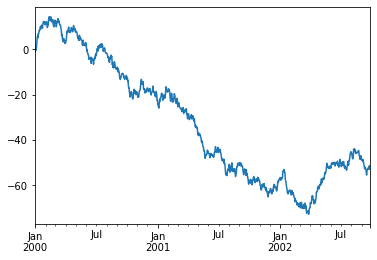

In [89]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
ts = ts.cumsum() # 누적 합계
ts.plot()

**plot() 메소드를 사용하여 여러 개의 열을 한 번에 그릴 수 있다**

<Figure size 432x288 with 0 Axes>

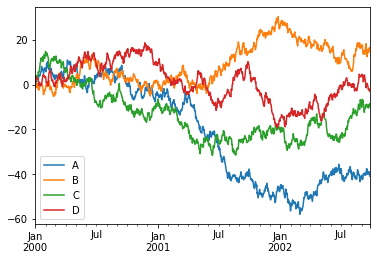

In [90]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = ['A', 'B', 'C', 'D'])
df = df.cumsum()

# figure() 함수: matplotlib에서 figure를 만들고 편집할 수 있게 만들어주는 함수
plt.figure()
df.plot()
# loc = 'best'는 레전드의 위치를 자동으로 계산하여 최적의 위치에 레전드를 위치시킨다
plt.legend(loc = 'best')

## 데이터 입/출력(Getting Data In/Out)
- Pandas는 데이터 파일을 읽어와서 데이터 프레임으로 만들 수 있다
    - CSV
    - Excel
    - HTML
    - JSON
    - HDF5
    - SAS
    - STATA
    - SQL
- 데이터 입/출력 관련 참고 사이트: 
    - 1. CSV 파일 입/출력: https://datascienceschool.net/view-notebook/c5ccddd6716042ee8be3e5436081778b/
    - 2. Excel 파일 입/출력: https://rfriend.tistory.com/464

### CSV 파일 입력
- CSV 파일 포맷은 데이터 값이 쉼표(,)로 구분되는 텍스트 파일
- pd.read_csv('data.csv', names = None, index_col = None, sep = None, skiprows = None, na_values = None)
    - names: 데이터 파일에 열 인덱스 정보가 없는 경우 --> ex) names = ['c1', 'c2', 'c3']
    - index_col: 테이블 내의 특정한 열을 행 인덱스로 지정하고 싶은 경우 --> ex) index_col = 'c1'
    - sep: 데이터를 구분하는 구분자가 쉼표(,)가 아닌 경우, sep 인수를 써서 구분자를 지정 --> ex) sep = '\s+' => 구분자의 길이가 정해지지 않은 공백인 경우
    - skiprows: 데이터 중에 건너 뛰어야 할 행이 있는 경우 --> ex) skiprows = [0, 1]
    - na_values: 특정한 값을 NaN 으로 취급하고 싶은 경우 --> ex) na_values = ['누락']

### CSV 파일 출력
- to_csv() 메소드를 사용
    - ex) df.to_csv('data.csv', sep = None, na_rep = None, index = None, header = None)
        - sep: 구분자 변경 --> ex) sep = '|'
        - na_rep: NaN 으로 입력된 값을 변경 --> ex) na_rep = '누락'
        - index: 인덱스 출력 여부 지정 --> ex) index = False
        - header: 헤더 출력 여부 지정 --> ex) header = False

### Excel 파일 입/출력
- pd.read_excel('data.xlsx', ...)
- CSV 파일 입/출력과 거의 유사하다
- 위에 적어놓은 Excel 파일 입/출력 관련 사이트를 참고하자!!